# Data Wrangling 

In [1]:
import pandas as pd

In [2]:
sent_data = pd.read_csv('amazon_reviews.csv')

In [3]:
#Let's take a look at the data
sent_data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [4]:
#We can delete the Unnamed:0 column
sent_data.drop(columns="Unnamed: 0", inplace=True)
sent_data.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [5]:
#Is there any NAN values?
sent_data.isna().sum()

reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

It seems like there is only two values that have NAN. We can keep the NAN for reviewerName, since the rest of that row is intact. We can change the name though. 

For the reviewText that has NAN in it, we will have to do something else. Since the review is the most important part, that row will deleted. 

In [6]:
sent_data['reviewText'].isnull().values.any()

True

In [7]:
#Let's see the record
na = sent_data[sent_data['reviewText'].isna()]
na

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
125,Alexander Stevens,5.0,NaN,2012-08-21,839,2,1,3,1,0.666667,0.20766


In [8]:
#We can drop it
sent_data = sent_data.drop(sent_data.index[125])

In [9]:
sent_data['reviewText'].isnull().values.any()

False

In [10]:
#Let's make sure
sent_data.iloc[125]

reviewerName                                                Alex & Autumn
overall                                                               5.0
reviewText              My husband and I bought this for our GoPro and...
reviewTime                                                     2014-05-13
day_diff                                                              209
helpful_yes                                                             0
helpful_no                                                              0
total_vote                                                              0
score_pos_neg_diff                                                      0
score_average_rating                                                  0.0
wilson_lower_bound                                                    0.0
Name: 126, dtype: object

# Exploratory Data Analysis

We'll start with finding Character Frequency.

In [11]:
#Let's concatenate the text as one string. We also have to make sure that there are no spaces
text_data = sent_data['reviewText'].str.replace(' ', '').str.cat(sep=' ')

In [12]:
#let's create a dictionary to save the frequencies of the characters
char_freq = {}

for char in text_data:
    if char in char_freq:
        char_freq[char] += 1
    else:
        char_freq[char] = 1

sorted_char_freq = {k: v for k, v in sorted(char_freq.items(), key=lambda item: item[1], reverse=True)}

characters = list(sorted_char_freq.keys())
frequencies = list(sorted_char_freq.values())

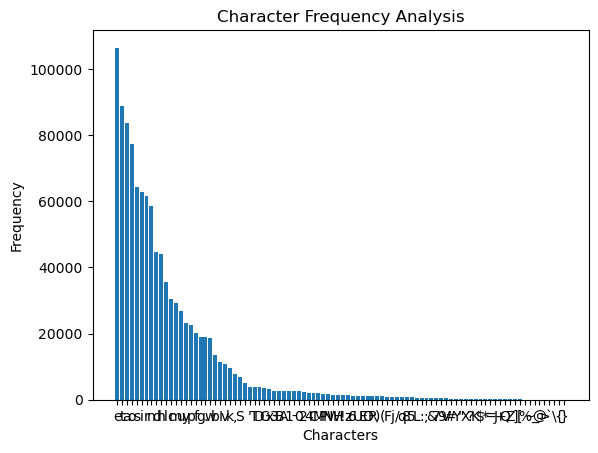

In [13]:
#Let's plot it
import matplotlib.pyplot as plt 
plt.bar(characters, frequencies)
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.title("Character Frequency Analysis")
plt.show()

It's a bit muddled. Let's see the character:frequency pairs. 

In [14]:
sorted_char_freq

{'e': 106473,
 't': 88777,
 'a': 83779,
 'o': 77232,
 's': 64255,
 'i': 62879,
 'r': 61502,
 'n': 58547,
 'd': 44697,
 'h': 44039,
 'l': 35470,
 'c': 30535,
 'm': 29170,
 'u': 26982,
 'y': 23264,
 'p': 22533,
 'f': 20255,
 'g': 19104,
 '.': 18895,
 'w': 18707,
 'b': 13607,
 'I': 11435,
 'v': 10930,
 'k': 9550,
 ',': 7816,
 'S': 6970,
 ' ': 4913,
 "'": 3989,
 'T': 3940,
 'D': 3920,
 'G': 3681,
 'x': 3142,
 '3': 2748,
 'B': 2688,
 'A': 2631,
 '1': 2578,
 '-': 2528,
 '0': 2524,
 '2': 2440,
 '4': 2061,
 'C': 1979,
 'M': 1960,
 'P': 1802,
 'N': 1730,
 'W': 1570,
 'H': 1543,
 '!': 1394,
 'z': 1291,
 '6': 1252,
 'U': 1135,
 'E': 1089,
 'O': 1074,
 'R': 1049,
 ')': 1043,
 '(': 980,
 'F': 969,
 'j': 967,
 '/': 918,
 'q': 838,
 '8': 715,
 '5': 708,
 'L': 669,
 ':': 478,
 ';': 477,
 '&': 470,
 '7': 415,
 '9': 411,
 'V': 402,
 '#': 352,
 'Y': 350,
 '"': 298,
 'X': 291,
 '?': 273,
 'K': 238,
 '$': 235,
 '*': 201,
 '=': 157,
 'J': 144,
 '+': 119,
 'Q': 118,
 'Z': 93,
 ']': 77,
 '[': 76,
 '%': 49,
 '

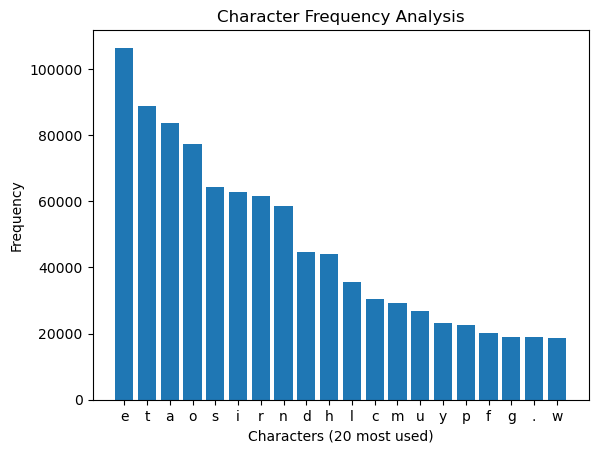

In [15]:
#Let's look at the 20 most used characters 
plt.bar(characters[:20], frequencies[:20])
plt.xlabel("Characters (20 most used)")
plt.ylabel("Frequency")
plt.title("Character Frequency Analysis")
plt.show()

It seems that 'e','t','a', and 'o' are the most frequent characters.

In [16]:
sent_data['reviewText'] = sent_data['reviewText'].astype(str)

In [17]:
print(sent_data['reviewText'].dtype)

object


In [18]:
#Let's do word frequency analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

sent_data['reviewText'] = sent_data['reviewText'].astype(str)
word_data = sent_data['reviewText'].str.lower()  

stop_words = set(stopwords.words('english'))
word_tokens = []
for text in word_data:
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    word_tokens.extend(cleaned_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16096\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\16096\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
#Much like the character frequency analysis, we'll create a dictionary for the words
word_freq = {}

for word in word_tokens:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

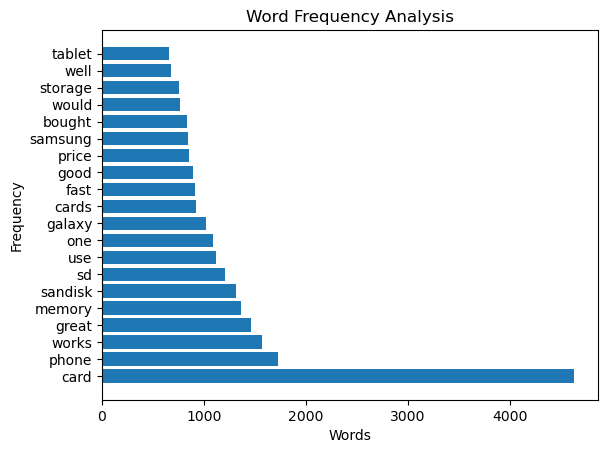

In [20]:
#Let's plot it. A horizontal bar graph would be more helpful than a vertical bar graph. 
sorted_word_freq = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)}

words = list(sorted_word_freq.keys())
frequencies = list(sorted_word_freq.values())

plt.barh(words[:20], frequencies[:20])  
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Analysis")
plt.show()

'card' is much higher than any word, with 'phone','works','great', and 'memory' being incredibly frequent as well. It seems that the overwhelming sentiment will be positive.

In [21]:
#Let's look at all the words and their frequencies
sorted_word_freq

{'card': 4634,
 'phone': 1727,
 'works': 1567,
 'great': 1460,
 'memory': 1361,
 'sandisk': 1318,
 'sd': 1203,
 'use': 1117,
 'one': 1087,
 'galaxy': 1022,
 'cards': 918,
 'fast': 908,
 'good': 892,
 'price': 852,
 'samsung': 840,
 'bought': 836,
 'would': 762,
 'storage': 759,
 'well': 675,
 'tablet': 655,
 'speed': 646,
 'music': 603,
 'class': 596,
 'using': 593,
 'got': 568,
 'get': 549,
 'product': 536,
 'gb': 535,
 'camera': 529,
 'micro': 528,
 'like': 522,
 'adapter': 509,
 'note': 505,
 'work': 490,
 'space': 462,
 'problems': 461,
 'worked': 460,
 'buy': 458,
 'issues': 451,
 'used': 451,
 'video': 435,
 'new': 423,
 'time': 420,
 'files': 410,
 'much': 403,
 'need': 401,
 'data': 400,
 'recommend': 392,
 'read': 387,
 'problem': 387,
 'far': 385,
 'fine': 377,
 'amazon': 372,
 'pictures': 371,
 'microsd': 367,
 'format': 360,
 'never': 359,
 'say': 358,
 'put': 353,
 'purchased': 344,
 'gopro': 340,
 'transfer': 339,
 'could': 338,
 'device': 337,
 'also': 337,
 'even': 331,

In [22]:
#Let's create a word cloud from our word frequency 
from wordcloud import WordCloud
cloud_data = sent_data['reviewText'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cloud_data)

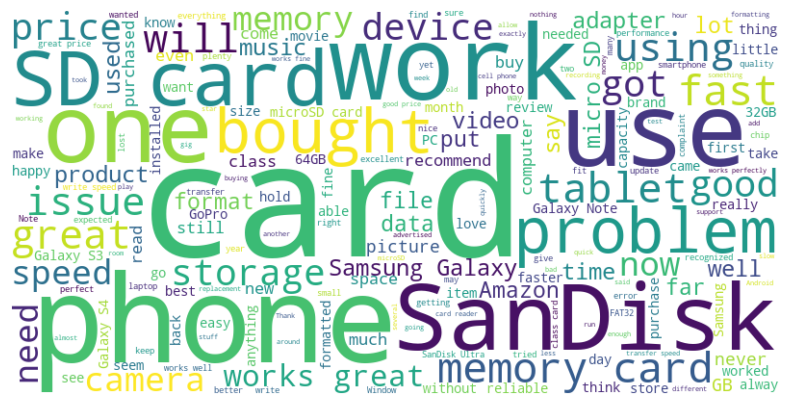

In [23]:
#Let's plot it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

This matches the graph, with 'card' and 'phone' being the largest words in the cloud. 

In [24]:
#Let's see what words are most often associated with the most frequent words
from collections import defaultdict

context_window = 2  

co_occurrences = defaultdict(lambda: defaultdict(int))

for i, word in enumerate(word_tokens):
    start = max(0, i - context_window)
    end = min(len(word_tokens), i + context_window + 1)
    for j in range(start, end):
        if i != j:
            co_occurrences[word][word_tokens[j]] += 1

In [25]:
#Let's see 'card' and its associations
target_word = 'card'  

associations = co_occurrences[target_word]
sorted_associations = {k: v for k, v in sorted(associations.items(), key=lambda item: item[1], reverse=True)}

print(f"Associations for '{target_word}':")
for word, count in sorted_associations.items():
    print(f"{word}: {count}")

Associations for 'card':
sd: 740
memory: 602
phone: 328
card: 262
micro: 260
works: 259
great: 231
class: 218
sandisk: 194
use: 193
fast: 186
microsd: 175
bought: 169
adapter: 137
good: 134
gb: 129
galaxy: 125
samsung: 124
using: 123
new: 121
one: 117
reader: 109
would: 109
got: 108
format: 96
worked: 96
recommend: 95
price: 94
put: 91
used: 90
get: 89
speed: 88
well: 88
problems: 86
purchased: 83
work: 79
say: 78
files: 76
problem: 75
storage: 74
read: 74
old: 71
need: 70
issues: 69
camera: 65
data: 64
like: 63
fine: 62
faster: 60
could: 60
tablet: 59
came: 58
amazon: 54
computer: 52
device: 51
buy: 51
formatted: 51
little: 50
write: 49
gopro: 49
music: 48
size: 47
ultra: 46
even: 46
also: 45
microsdhc: 45
note: 44
brand: 42
far: 42
tried: 42
first: 42
another: 41
recognized: 41
back: 41
perfectly: 41
really: 40
go: 40
onto: 40
transfer: 39
video: 39
pc: 39
space: 38
speeds: 37
sure: 37
still: 37
since: 36
never: 36
reliable: 35
love: 35
able: 35
installed: 35
needed: 35
much: 35
take

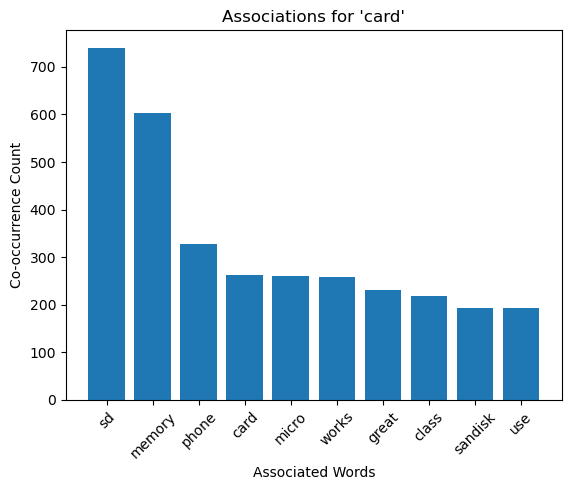

In [26]:
#Let's plot it
top_n = 10  

plt.bar(list(sorted_associations.keys())[:top_n], list(sorted_associations.values())[:top_n])
plt.xlabel("Associated Words")
plt.ylabel("Co-occurrence Count")
plt.title(f"Associations for '{target_word}'")
plt.xticks(rotation=45)
plt.show()

In [27]:
#Let's see 'phone' and its associations
target_word = 'phone'  

associations = co_occurrences[target_word]
sorted_associations = {k: v for k, v in sorted(associations.items(), key=lambda item: item[1], reverse=True)}

print(f"Associations for '{target_word}':")
for word, count in sorted_associations.items():
    print(f"{word}: {count}")

Associations for 'phone':
card: 328
works: 120
galaxy: 119
phone: 102
use: 94
memory: 91
cell: 91
great: 83
music: 81
android: 79
storage: 74
samsung: 72
one: 65
smart: 56
put: 55
got: 53
tablet: 52
recognized: 50
new: 47
sd: 46
using: 43
camera: 43
used: 43
format: 42
note: 42
issues: 40
would: 39
space: 38
computer: 37
pictures: 35
worked: 35
well: 35
bought: 34
good: 31
fast: 30
problem: 30
read: 29
store: 29
problems: 28
work: 28
back: 28
gb: 28
take: 27
need: 27
fine: 27
like: 26
first: 26
microsd: 26
much: 25
months: 25
data: 25
files: 24
movies: 24
perfectly: 23
videos: 23
video: 23
pc: 22
installed: 22
old: 22
wife: 21
formatted: 21
lot: 21
purchased: 21
could: 20
get: 20
perfect: 20
right: 19
needed: 19
time: 19
started: 18
able: 18
still: 18
extra: 18
internal: 18
never: 17
sure: 17
capacity: 17
enough: 17
know: 17
tried: 16
cards: 16
without: 16
even: 16
seems: 16
photos: 16
since: 15
ca: 15
apps: 15
immediately: 15
turned: 15
transfer: 15
working: 15
also: 15
class: 14
sand

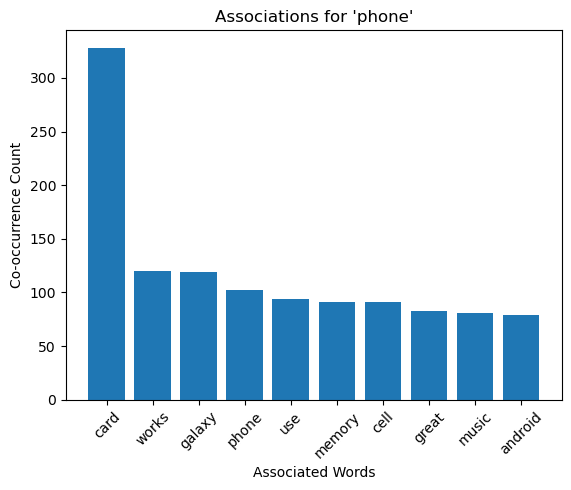

In [28]:
#Let's plot it
top_n = 10  

plt.bar(list(sorted_associations.keys())[:top_n], list(sorted_associations.values())[:top_n])
plt.xlabel("Associated Words")
plt.ylabel("Co-occurrence Count")
plt.title(f"Associations for '{target_word}'")
plt.xticks(rotation=45)
plt.show()

In [29]:
#Let's see 'memory' and its associations
target_word = 'memory'  

associations = co_occurrences[target_word]
sorted_associations = {k: v for k, v in sorted(associations.items(), key=lambda item: item[1], reverse=True)}

print(f"Associations for '{target_word}':")
for word, count in sorted_associations.items():
    print(f"{word}: {count}")

Associations for 'memory':
card: 602
cards: 134
phone: 91
sandisk: 84
works: 76
bought: 73
great: 62
use: 57
gb: 50
fast: 49
internal: 49
class: 48
tablet: 47
good: 47
samsung: 41
galaxy: 40
say: 39
flash: 39
adapter: 38
expand: 37
microsdhc: 36
used: 35
much: 34
memory: 34
price: 33
purchased: 32
micro: 30
need: 28
get: 27
one: 26
using: 26
got: 26
extra: 25
lot: 24
sd: 24
speed: 24
note: 23
device: 23
best: 23
would: 23
needed: 22
well: 20
recommend: 19
work: 18
never: 18
like: 18
buy: 17
go: 17
microsdxc: 17
comes: 16
enough: 16
microsd: 16
worked: 16
issues: 15
needs: 15
brand: 15
always: 15
little: 15
add: 15
problems: 15
small: 15
really: 14
products: 14
reliable: 14
camera: 14
space: 13
store: 13
android: 13
quality: 13
amount: 13
storage: 13
pictures: 13
external: 13
new: 13
product: 13
gopro: 13
anyone: 13
put: 13
additional: 12
ever: 12
music: 12
problem: 12
could: 12
lots: 12
capacity: 12
time: 12
phones: 12
plenty: 12
ultra: 11
available: 11
buying: 11
amazon: 11
smartphone

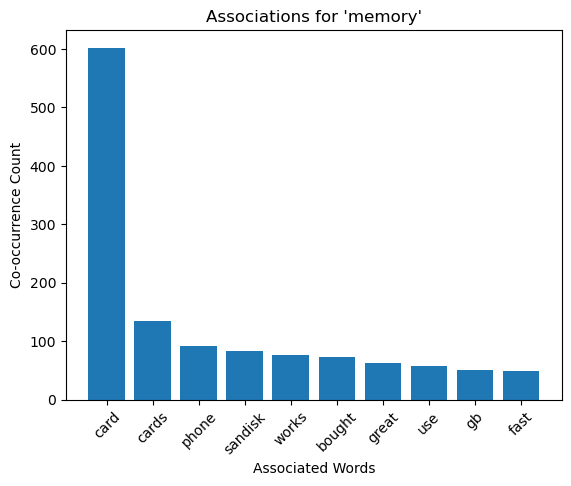

In [30]:
#Let's plot it
top_n = 10  

plt.bar(list(sorted_associations.keys())[:top_n], list(sorted_associations.values())[:top_n])
plt.xlabel("Associated Words")
plt.ylabel("Co-occurrence Count")
plt.title(f"Associations for '{target_word}'")
plt.xticks(rotation=45)
plt.show()

Most of the associations have are more technical such as 'card','phone','memory', and 'sd'. However, in terms of association when it relates to sentiment, it seems positive. This is because they are heavily associated with 'great', 'fast', and 'works'.